## 1,2 tonu Dalgacik Donusumu
### Sekil 3.33


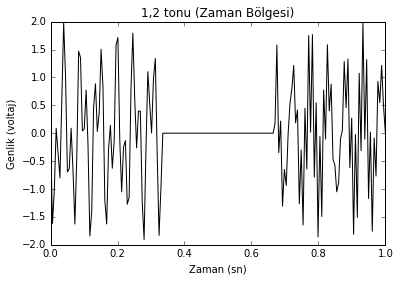

In [4]:
# Tanimlar
def scalogram(data, vmin=None, vmax=None, linear=False):
    """ scalogram(data, vmin=None, vmax=None)
    Plots a scalogram for wavelet transforms generated by
    pywt.wavedec using imshow.
    """
    bottom = 0

    if not vmin:
        vmin = min(map(lambda x: min(abs(x)), data))
    if not vmax:
        vmax = max(map(lambda x: max(abs(x)), data))

    if linear:
        scale=1./len(data);

    plt.gca().set_autoscale_on(False)

    for row in range(0, len(data)):
        if not linear:
            scale = 2.0 ** (row - len(data))

        plt.imshow(
            np.array([abs(data[row])]),
            interpolation = 'nearest',
            vmin = vmin,
            vmax = vmax,
            extent = [0, 1, bottom, bottom + scale])

        bottom += scale


def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
import matplotlib.pyplot as plt
import numpy as np
import pywt   
get_ipython().magic('matplotlib inline')

L=180;
t=np.linspace(0,1,L) # ornekleme araligi ornekleyecegimiz frekansin en az iki kati olmali.
ton1=np.sin(2*np.pi*697*t) + np.sin(2*np.pi*1209*t)
ton2=np.sin(2*np.pi*697*t) + np.sin(2*np.pi*1339*t)
ton=np.zeros(ton1.shape);
# isaretin bir kismini silelim
#ton[np.int(np.floor(L/3)):np.int(np.floor(2*L/3))]=0;
ton[0:np.int(np.floor(L/3))]=ton1[0:np.int(np.floor(L/3))];
ton[np.int(np.floor(2*L/3)):]=ton2[np.int(np.floor(2*L/3)):];
setup_graph(title=u'1,2 tonu (Zaman Bölgesi)', x_label=u'Zaman (sn)', y_label=u'Genlik (voltaj)')
plt.plot(t,ton, 'k');
plt.xlim([0,1]);plt.ylim([-2,2]);

Yukaridaki isaretin DB4 dalgacigi ile dalgacik transformuna bakalim. 

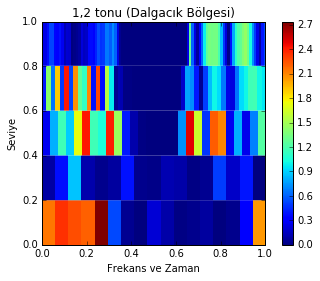

In [5]:
wavelet_type='db4';
w = pywt.Wavelet(wavelet_type)
# Gereken dekompozisyon seviyesi
dwt_max_level=pywt.dwt_max_level(L, w)

coeff = pywt.wavedec(ton, wavelet_type, level=dwt_max_level)

setup_graph(title=u'1,2 tonu (Dalgacık Bölgesi)', x_label=u'Frekans ve Zaman', y_label=u'Seviye')
scalogram(coeff, linear=True);plt.colorbar()
